# Exponential distribution parameter estimation
Can we model the number of games played between each no-hitter in MLB with an exponential distribution?

In [3]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The average of the number of games played between each no-hitter was used as an estimate for the parameter tau for an exponential distribution. 500,000 random samples were then drawn from this distribution to compare to the results observed.

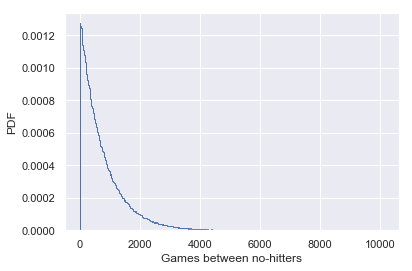

In [12]:
# Array of number of games played between each no-hitter in MLB (1901-2015)
nohitter_times = [843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467]

# Mean no-hitter time, tau, as time constant for exponential distribution
tau = np.mean(nohitter_times)

# Random exponential distribution with parameter tau
np.random.seed(42)
inter_nohitter_time = np.random.exponential(tau, 500000)

# PDF of randomly sampled exponential distribution from above
plt.hist(inter_nohitter_time, bins=500, density=True, histtype='step')
plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')
plt.show()

The CDF for both the real data and the random data from an exponential distribution above were computed and plotted together. The real data follows the theoretical data very closely, so no-hitters do seem to be exponentially distributed and independent of each other.

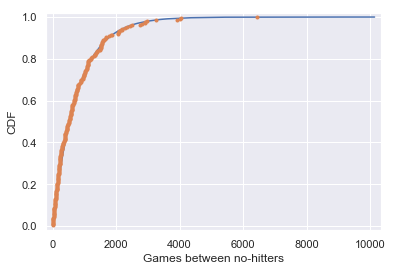

In [13]:
# Function for the ECDF (empirical cumulative distribution function) with 1-D array as input
def ecdf(data):
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1)/n

    return x, y

# ECDF from real data vs. theoretical samples
x, y = ecdf(nohitter_times)
x_theor, y_theor = ecdf(inter_nohitter_time)

# Plot overlays
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')
plt.show()

When compared to different time constants, it is apparent that the mean characterizes the data the best.

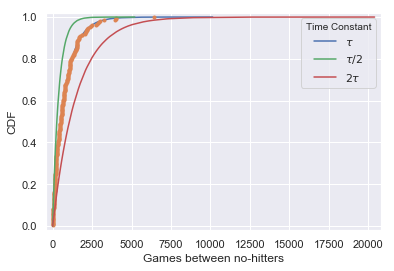

In [24]:
# Samples with half and double tau
samples_half = np.random.exponential(tau/2, 500000)
samples_double = np.random.exponential(2*tau, 500000)

# ECDFs of new samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot all the CDFs
plt.plot(x_theor, y_theor, label=r'$\tau$')
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.plot(x_half, y_half, label=r'$\tau/2$')
plt.plot(x_double, y_double, label=r'$2\tau$')
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')
plt.legend(title='Time Constant')
plt.show()